# Exploring Data

In [551]:
# import the imprant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import missingno as mno

In [552]:
# read the data
data=pd.read_csv("Credit-History.csv", index_col=0)

In [553]:
# check the shape of the data
data.shape

(981, 13)

In [554]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [555]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [556]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

# Data Cleaning

## Looking for uniques values

To understand how to proceed with the missing values

In [557]:
print("Unique values of gender column")
print(data.Gender.unique())

print("Unique values of Married column")
print(data.Married.unique())

print("Unique values of Dependents column")
print(data.Dependents.unique())

print("Unique values of Education column")
print(data.Education.unique())

print("Unique values of Self_Employed column")
print(data.Self_Employed.unique())

# print("Unique values of LoanAmount column")
# print(data.LoanAmount.unique())

print("Unique values of Loan_Amount_Term column")
print(data.Loan_Amount_Term.unique())

print("Unique values of Credit_History column")
print(data.Credit_History.unique())

print("Unique values of Loan_Status column")
print(data.Loan_Status.unique())

Unique values of gender column
['Male' 'Female' nan]
Unique values of Married column
['No' 'Yes' nan]
Unique values of Dependents column
['0' '1' '2' '3+' nan]
Unique values of Education column
['Graduate' 'Not Graduate']
Unique values of Self_Employed column
['No' 'Yes' nan]
Unique values of Loan_Amount_Term column
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12. 350.   6.]
Unique values of Credit_History column
[ 1.  0. nan]
Unique values of Loan_Status column
['Y' 'N' nan]


Since there are only 981 values per catergory we will try to fill the nan values instead of deleting them

## Filling nan values for Gender column
Since this column does is independable of the other we will create another value "not_especified"

In [558]:
data.Gender[data.Gender.isna()]="not_especified"

<ipython-input-558-e1d14f91a802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data.Gender.isna()]="not_especified"


## Filling nan values for Married column
We will look for the CoapplicantIncome column to determine wether is married or not. If CoapplicantIncome is 0 we assume is not married

In [559]:
data[data.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [560]:
data.Married[data.Married.isna()]="No"

<ipython-input-560-3a57ba89f445>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Married[data.Married.isna()]="No"


## Filling nan values for Dependents column
Here we assume that nan values means that they do not have dependents

In [561]:
data.Dependents[data.Dependents.isna()]="0"

<ipython-input-561-7ed08ca88494>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Dependents[data.Dependents.isna()]="0"


## Filling nan values for Self_Employed column
Here we will assume that nan values represent that they are not self employed. This is because the mayority of people are employed.


In [562]:
data.Self_Employed[data.Self_Employed.isna()]="No"

<ipython-input-562-7849ea4aaabe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Self_Employed[data.Self_Employed.isna()]="No"


In [563]:
data.ApplicantIncome.mean()

5179.795107033639

## Filling the nan values for LoanAmount and Loan_Amount_Term  
Since these two are directly related we will look into them together
### LoanAmount

In [564]:
data[data.LoanAmount.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


We will fill each value of Loan Amount with the mean of the values of their respective Loan_Amount_Term value

In [565]:
data.LoanAmount[data.Loan_Amount_Term==360].mean()

144.42

In [566]:
data.LoanAmount[(data.Loan_Amount_Term==360)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==360].mean()

<ipython-input-566-486c2bfce784>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.LoanAmount[(data.Loan_Amount_Term==360)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==360].mean()


In [567]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.42,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.00,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.00,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.00,360.0,1.0,Rural,NaN


In [568]:
data[data.Loan_Amount_Term==180]
data.LoanAmount[(data.Loan_Amount_Term==180)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==180].mean()

<ipython-input-568-364aa004190c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.LoanAmount[(data.Loan_Amount_Term==180)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==180].mean()


In [569]:
data[data.Loan_Amount_Term==240]
data.LoanAmount[(data.Loan_Amount_Term==240)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==240].mean()

<ipython-input-569-999f9767c501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.LoanAmount[(data.Loan_Amount_Term==240)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==240].mean()


In [570]:
data[data.Loan_Amount_Term==480]
data.LoanAmount[(data.Loan_Amount_Term==480)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==480].mean()

<ipython-input-570-5d2343f4d10e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.LoanAmount[(data.Loan_Amount_Term==480)&(data.LoanAmount.isna())]=data.LoanAmount[data.Loan_Amount_Term==480].mean()


### Loan_Amount_Term

In [571]:
data[data.Loan_Amount_Term.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [572]:
print(data.LoanAmount[data.Loan_Amount_Term.isna()].max())
print(data.LoanAmount[data.Loan_Amount_Term.isna()].min())

187.0
70.0


In [573]:
data[data.LoanAmount.isin(np.arange(70,188,1))]
data.Loan_Amount_Term[(data.LoanAmount.isin(np.arange(70,188,1)))&(data.Loan_Amount_Term.isna())]=data.Loan_Amount_Term[data.LoanAmount.isin(np.arange(70,188,1))].mean()

<ipython-input-573-83dd3904b0e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Loan_Amount_Term[(data.LoanAmount.isin(np.arange(70,188,1)))&(data.Loan_Amount_Term.isna())]=data.Loan_Amount_Term[data.LoanAmount.isin(np.arange(70,188,1))].mean()


## Filling nan values for Credit_History column

In [574]:
data.Credit_History=data.Credit_History.replace({1:"Yes",0:"No"})
data.Credit_History=data.Credit_History.fillna("NA")

### Filling Loan_Status column

Here I am not sure how to proceed because there are so many nan values and I guess this columns means whether you have a Loan or not right? So in the values of "N" there are some with Loan Amoun that are more than 0 so I don't see the relation. Maybe we should just delete this columns because I don't see what is the values if it doesn't add to the analysis.

In [575]:
data[data.Loan_Status.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,Yes,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,Yes,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,Yes,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NA,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,Yes,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,Yes,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,Yes,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NA,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,Yes,Rural,NaN


In [576]:
data.Loan_Status[data.Loan_Status=="N"].count()

192

In [577]:
data[data.Loan_Status=="N"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000,360.0,Yes,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000,360.0,No,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000,360.0,Yes,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.000,360.0,Yes,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.000,360.0,No,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.000,360.0,Yes,Rural,N
597,LP002943,Male,No,0,Graduate,No,2987,0.0,88.000,360.0,No,Semiurban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.000,180.0,NA,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,131.125,180.0,Yes,Urban,N


In [578]:
data.LoanAmount[data.Loan_Status=="N"].unique()

array([128.   , 158.   , 349.   , 114.   ,  76.   , 133.   , 104.   ,
       116.   , 112.   , 151.   ,  35.   , 201.   ,  74.   , 106.   ,
       320.   , 100.   ,  80.   , 120.   , 134.   , 286.   , 135.   ,
       165.   , 144.42 , 258.   , 126.   , 136.   ,  95.   , 113.   ,
       176.   , 110.   , 180.   , 167.   , 265.   , 216.   , 152.   ,
       175.   , 160.   , 182.   , 290.   ,  84.   , 242.   , 129.   ,
       185.   , 225.   , 118.   , 244.   , 275.   , 121.   ,  63.   ,
        81.   ,  87.   , 495.   , 102.   ,  67.   , 260.   ,  66.   ,
       164.   , 170.   ,  83.   , 131.125, 127.   , 214.   ,  72.   ,
        60.   , 138.   , 255.   , 140.   , 192.   , 115.   ,  94.   ,
       304.   , 155.   ,  99.   , 143.   ,  93.   , 480.   , 159.   ,
       376.   , 173.   ,  46.   , 308.   , 105.   ,  96.   , 124.   ,
       570.   , 111.   ,  71.   , 103.   ,  45.   ,  65.   , 194.   ,
       360.   ,  62.   , 218.   , 178.   , 239.   , 187.   ,  55.   ,
       150.   , 190.

In [579]:
data.Loan_Status[data.Loan_Status=="Y"].count()

422

In [580]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.42,360.0,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00,360.0,Yes,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.00,360.0,Yes,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.00,360.0,NA,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.00,360.0,Yes,Rural,NaN


In [581]:
data.LoanAmount.isna().sum()
data.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

# Data Analysis 

## Gender impact on Loan Amount 

In [582]:
data.groupby("Gender").Gender.count()

Gender
Female            182
Male              775
not_especified     24
Name: Gender, dtype: int64

Since the amount of Female and Male are not equal we will the check the mean of Loan Amount

In [583]:
data.groupby("Gender").LoanAmount.mean()

Gender
Female            126.999335
Male              145.363961
not_especified    168.125000
Name: LoanAmount, dtype: float64

Text(0, 0.5, 'Loan amount')

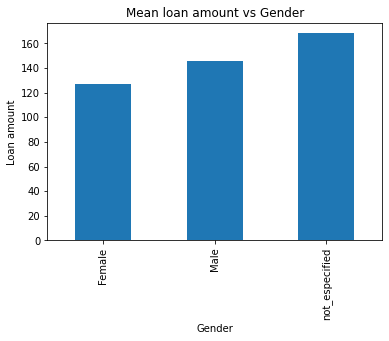

In [584]:
data.groupby("Gender").LoanAmount.mean().plot.bar()
plt.title("Mean loan amount vs Gender")
plt.ylabel("Loan amount")

There is approximately 18% increase in the LoanAmount given to men

## Education impact on Loan Amount

Firts is important to se the graduate ratio between males and females

In [585]:
data.groupby(['Gender' ,'Education']).Gender.count()

Gender          Education   
Female          Graduate        148
                Not Graduate     34
Male            Graduate        596
                Not Graduate    179
not_especified  Graduate         19
                Not Graduate      5
Name: Gender, dtype: int64

In [586]:
print("Female Graduate ratio")
print((data.groupby(['Gender' ,'Education']).Gender.count()[0])/(data.groupby(['Gender' ,'Education']).Gender.count()[0:2].sum()))
print("Male Graduate ratio")
print((data.groupby(['Gender' ,'Education']).Gender.count()[2])/(data.groupby(['Gender' ,'Education']).Gender.count()[2:4].sum()))
print("not_especified Graduate ratio")
print((data.groupby(['Gender' ,'Education']).Gender.count()[4])/(data.groupby(['Gender' ,'Education']).Gender.count()[4:6].sum()))


Female Graduate ratio
0.8131868131868132
Male Graduate ratio
0.7690322580645161
not_especified Graduate ratio
0.7916666666666666


Even though the graduate ratio among the Gender categories are similar it is important to check how the education affect the loan amount for each gender category

Text(0, 0.5, 'Loan amount')

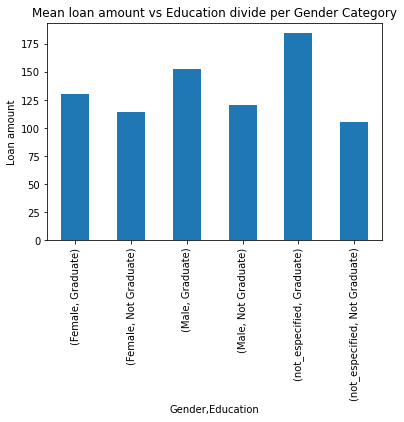

In [587]:
data.groupby(['Gender' ,'Education']).LoanAmount.mean().plot.bar()
plt.title("Mean loan amount vs Education divide per Gender Category")
plt.ylabel("Loan amount")

When the applicant is graduated tends to recived a bigger loan. In the male category the increase is bigger than for the women.

## Creating "Total_Income_of_Household" column

This column is necesary to analyse the impact of the household income in the amoun of loan received

In [588]:
data["Total_Income_of_Household"]=data.ApplicantIncome + data.CoapplicantIncome
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_of_Household
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.42,360.0,Yes,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,Yes,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,Yes,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,Yes,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,Yes,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00,360.0,Yes,Urban,NaN,5786.0
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.00,360.0,Yes,Urban,NaN,4867.0
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.00,360.0,NA,Semiurban,NaN,5243.0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.00,360.0,Yes,Rural,NaN,7393.0


## Find distribution of data between Total_Income_of_Household vs LoanAmount

Text(0.5, 1.0, 'Total_Income_of_Household vs LoanAmount')

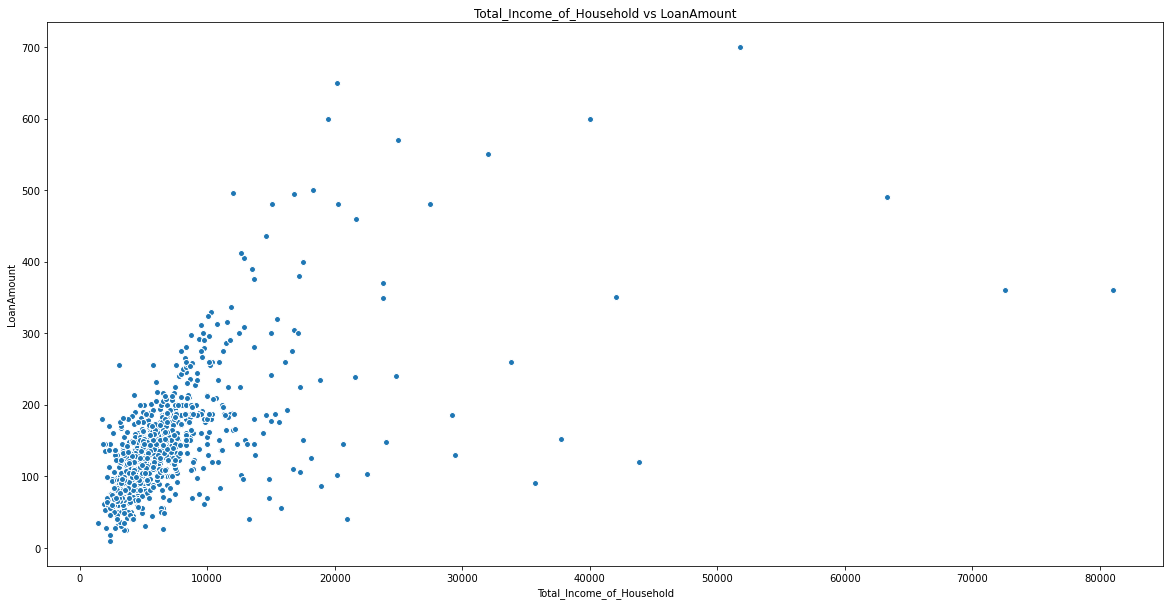

In [589]:
plt.figure(figsize=(20,10))
plt.scatter(data.Total_Income_of_Household,data.LoanAmount,edgecolors="white")
plt.xlabel("Total_Income_of_Household")
plt.ylabel("LoanAmount")
plt.title("Total_Income_of_Household vs LoanAmount")


As expected the bigger the Household income the bigger the loan the family will recieved.

## Impact of dependents with respect of Loan Amount

Text(0, 0.5, 'Total Income of Household')

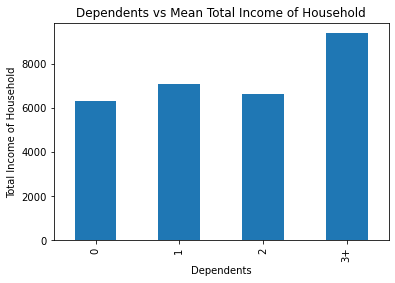

In [594]:
data.groupby("Dependents").Total_Income_of_Household.mean().plot.bar()
plt.title("Dependents vs Mean Total Income of Household")
plt.ylabel("Total Income of Household")

Text(0, 0.5, 'Loan Amount')

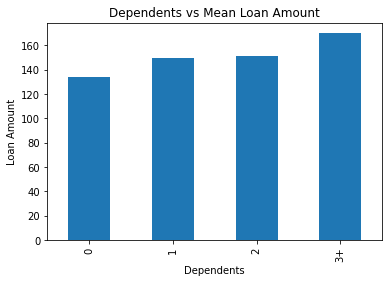

In [595]:
data.groupby("Dependents").LoanAmount.mean().plot.bar()
plt.title("Dependents vs Mean Loan Amount")
plt.ylabel("Loan Amount")

Eventhough families with 3+ dependents have a bigger household income and thus they recieved larges loan amounts. In the families with 2 dependents the mean of household income is less than familie with 1 dependets yet the families with 2 dependents received larger loans. This could mean that the bank support the growth of the families that need more monetary help.  

# Conclusion

After performing some data cleaning of the dataset the following relations where discovered:
1. The male applicants tend to receive 18% bigger loans than female applicants.
2. Education plays an important role for receiving bigger loans. For all applicants if they graduated they received bigger loans.
3. The household income amount is directly related to the amount received in the loan. The bigger the household income the bigger the loan. 
4. Families with more dependents tend to received bigger loans. 

# Cleanning of Dataset

In [117]:
data[data['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [118]:
#Those persons don't have any loan amount, means zero loan amount
zero_loan_amount=data.loc[data['LoanAmount'].isna()]
zero_loan_amount.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


In [119]:
#Those persons doesn't have credit histroy
no_credit_history=data.loc[data['Credit_History'].isna()]
no_credit_history.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [120]:
#Those people doesn't have both loan amount and credit history
data.loc[(data['LoanAmount'].isna()) & (data['Credit_History'].isna())]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


In [121]:
#Drop the rows(persons) if there is no Loan amount and no credit history because we cannot predict credit history of this person
data=data.dropna(subset=['LoanAmount', 'Credit_History'], how='all')

In [122]:
#If loan amount is 1 or greater we changed the loan status to 'Y' means Yes, considering their loas status is yes
#NaN values are replaced with Y.
#data1=data['Loan_Status'] = np.where(data['LoanAmount'] >= 1, 'Y', data['LoanAmount'])
data['Loan_Status'] = np.where(data['LoanAmount'] >= 1, 'Y', data['LoanAmount'])

In [123]:
data.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        54
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           26
Loan_Amount_Term     20
Credit_History       78
Property_Area         0
Loan_Status           0
dtype: int64

In [124]:
#Mostly values at the end of Loan status column were NaN but their Loan Amount is mentioned, now we can see it replaced by 'Y' 
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,Y
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [125]:
#check nan values in the column 'Loan_Status'
nan_loan_status=data.loc[data['Loan_Status'] == 'nan']

In [126]:
#There are 26 persons found which has nan value in Loan_Status and Loan Amount column 
nan_loan_status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,nan
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,nan
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,nan
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,nan
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,nan
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,nan
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,nan
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,nan
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,nan
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,nan


In [127]:
#Drop those 26 persons which has nan value in Loan_Status and Loan Amount column
# dt=data.drop(data[data['Loan_Status'] == 'nan'].index, inplace=True)
data.drop(data[data['Loan_Status'] == 'nan'].index, inplace=True)

In [128]:
# Fill NaN of all integer with 0. Above we can see 3 columns which has dtype int has NaN
data=data.fillna({"Dependents":0, 'Loan_Amount_Term':0, 'Credit_History': 0})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,0.0,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,Y


# Nan Values left
- still 2 columns 'Gender' and 'Self_Employed' has NaN value but it doesn't really effect the analysis of credit history.

In [129]:
data.isna().sum()

Loan_ID               0
Gender               23
Married               2
Dependents            0
Education             0
Self_Employed        54
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Plot for NAN values

<AxesSubplot:>

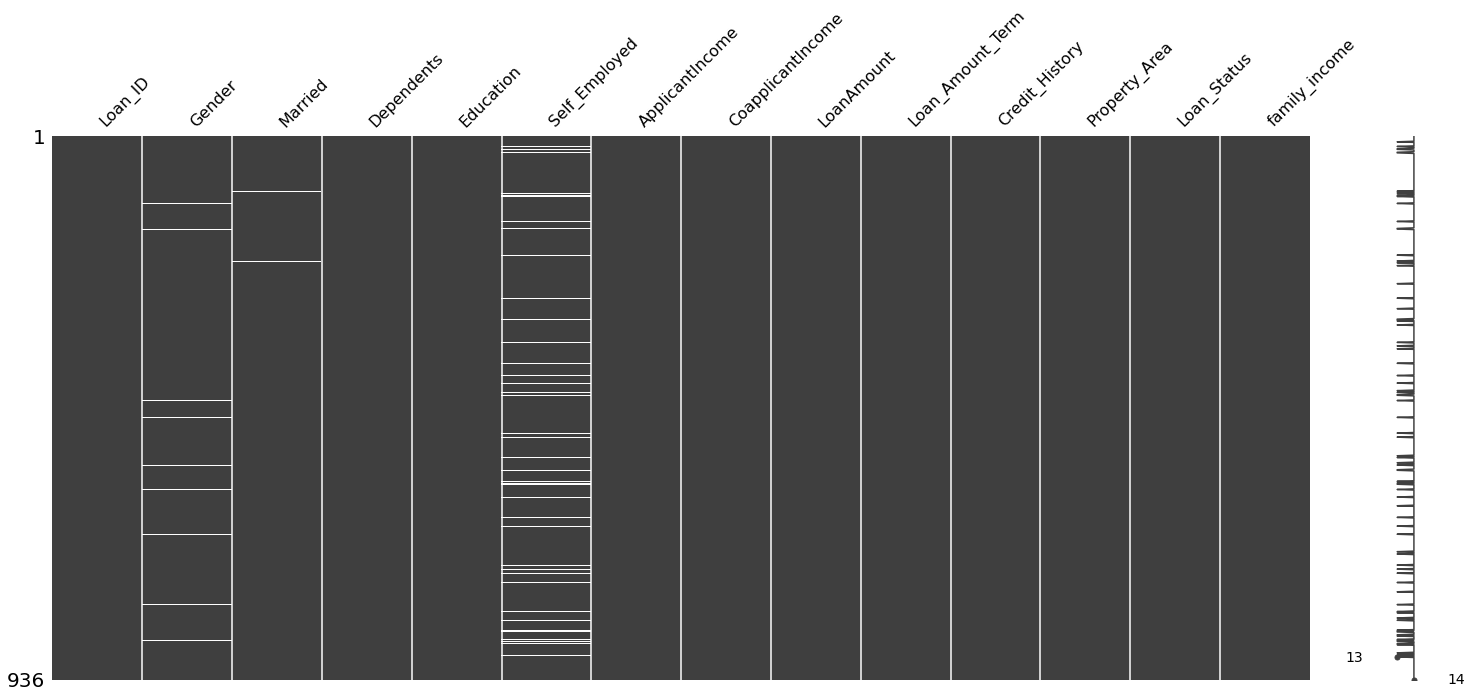

In [144]:
mno.matrix(data)

In [130]:
# checking the numerical data 
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,5105.868590,1607.926197,142.050214,335.252137,0.769231
std,5332.975228,2741.231955,76.904751,81.152952,0.421550
min,0.000000,0.000000,9.000000,0.000000,0.000000
25%,2875.750000,0.000000,100.000000,360.000000,1.000000
50%,3795.500000,1128.500000,126.000000,360.000000,1.000000
75%,5491.000000,2361.250000,161.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Discover the Male and Female ratio per occupation and sort it from the most to the least


In [131]:
data.groupby(['Gender' ,'Education']).Gender.count().astype('str')

Gender  Education   
Female  Graduate        142
        Not Graduate     33
Male    Graduate        569
        Not Graduate    169
Name: Gender, dtype: object

## Gender Ratio plot
- Plot shows which gender is more educated and more applied for the loan. 
- Both male and female graduated applied more and among these two male graduated are on top for buying loans.

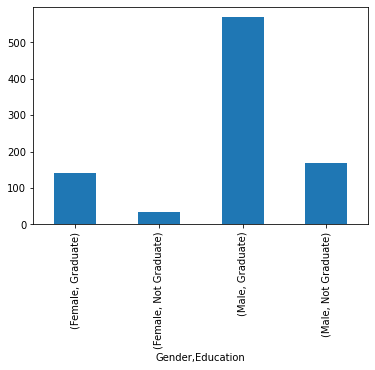

In [132]:
data.groupby(['Gender' ,'Education'])["Gender"].count().plot.bar();

# adding a new column family income

In [150]:
data['family_income']  = (data['ApplicantIncome']+ data['CoapplicantIncome']).astype('int') 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,family_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613


In [151]:
data.sort_values('family_income', ascending=False).reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,family_income
0,409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,Y,81000
1,333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,63337
2,171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,51763
3,185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,43897
4,600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,0.0,Urban,Y,42083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y,1963
932,216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,Y,1950
933,583,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,0.0,Rural,Y,1880
934,116,LP001607,Female,No,0,Not Graduate,No,0,1760.0,180.0,360.0,1.0,Semiurban,Y,1760


# Plot Family Income vs Loan Amount
- This graph shows comparison between total income of a family and their loan amount.
- It is little difficult to understand but when we see very deeply 
- there are some applicant who has good income with less loan it means low risk involve
- But some have low income with high loan, it means high risk involve
- Goal: We have to diversify between high risk and low risk candidates

<AxesSubplot:xlabel='family_income'>

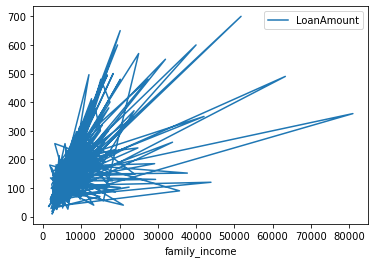

In [153]:
data.plot(x="family_income",y="LoanAmount")

## Plot: Low Risk-----Bar Plot
- 10 high income people with very less amount of loan, it clearly shows low risky people.

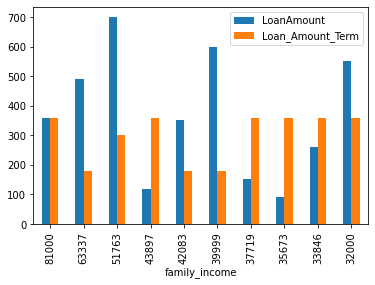

In [181]:
data.nlargest(columns="family_income",n=10)[["family_income","LoanAmount", "Loan_Amount_Term"]].plot(kind="bar", x="family_income");

## Plot High Income----Bar Plot
- We can see Income, LoanAmount and Loan amount term
- Found low risk

<AxesSubplot:xlabel='Loan_ID'>

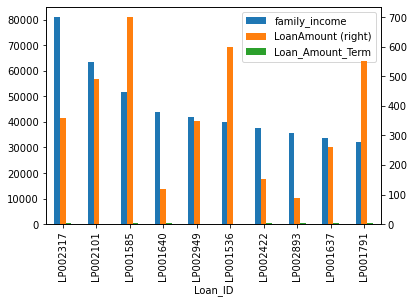

In [185]:
data.nlargest(columns="family_income",n=10).plot(kind="bar",x="Loan_ID",y=["family_income","LoanAmount","Loan_Amount_Term"], secondary_y=['LoanAmount'])                                          

## Plot High Risk
- These applicant has low income but comparatively their income loan amount is high
- Found high risk

<AxesSubplot:xlabel='Loan_ID'>

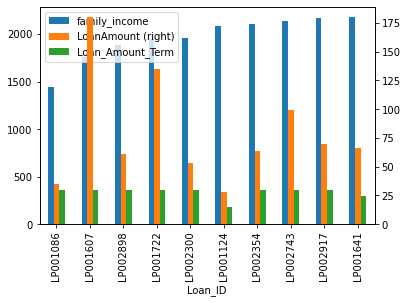

In [188]:
data.nsmallest(columns="family_income",n=10).plot(kind="bar",x="Loan_ID",y=["family_income","LoanAmount","Loan_Amount_Term"], secondary_y=["LoanAmount"])

## Stack Plot: Low Risk
- we can see with stack that very high income but very less loan amount
- It found low risk

<AxesSubplot:ylabel='Loan_ID'>

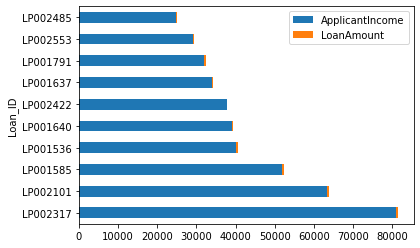

In [202]:
data.nlargest(columns="ApplicantIncome", n=10).plot(kind="barh",x="Loan_ID",y=["ApplicantIncome", "LoanAmount"], stacked=True)

## Stack Plot: High Risk
- Low income with high loan amount, it means high risk
- 2 applicant has zero income but they got loan are on very high risk

<AxesSubplot:ylabel='Loan_ID'>

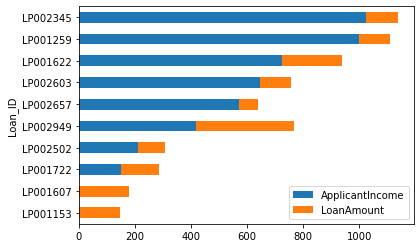

In [203]:
data.nsmallest(columns="ApplicantIncome", n=10).plot(kind="barh",x="Loan_ID",y=["ApplicantIncome", "LoanAmount"], stacked=True)

 ### calculate the minimum and maximum Loan amount based on education

In [26]:
data.groupby("Education").LoanAmount.agg([ "min","max"])

,min,max
Education,,
Graduate,9.0,700.0
Not Graduate,25.0,279.0


# Data Analysis

In [109]:
#Highincome = data.query('ApplicantIncome > 5000 and CoapplicantIncome > 1000  and Education == "Graduate" ', inplace = True )


In [110]:
Highincome

In [134]:
data.groupby('Dependents').sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,,,,,
0,93440,24283.000000,2618.0,6924.0,15.0
0,2465157,855090.120001,70312.0,177464.0,409.0
1,843558,235619.000000,22666.0,49728.0,117.0
2,746123,255065.799988,22775.0,51840.0,119.0
3+,630815,134961.000000,14588.0,27840.0,60.0
